In [1]:
#文件路径
import json
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

path = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_verification_test_nodupe_anon.jsonl'
path2 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_verification_train_nodupe_anon.jsonl'
path3 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_verification_val_nodupe_anon.jsonl'
path4 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_test_nodupe_anon.jsonl'
path5 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_train_nodupe_anon.jsonl'
path6 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_val_nodupe_anon.jsonl'
path7 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_attribution_test_anon.jsonl'
path8 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_attribution_train_anon.jsonl'
path9 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_attribution_val_anon.jsonl'

path10 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_test_nodupe_anon.jsonl'
path11 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_train_nodupe_anon.jsonl'
path12 = '/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_val_nodupe_anon.jsonl'
files = [path,path2,path3,path4,path5,path6,path7,path8,path9,path10,path11,path12]


In [2]:
def open_file(file_name):
    with open(file_name,encoding = 'utf-8') as fp:
        line = fp.readline()
        line = json.loads(line)
        #print(line)
        for key, value in line.items():
            print(key,":")
            print(value)
            print("--------------")
        fp.close()

In [3]:

def av_analysis(file_name):
    total_tokens = 0
    num_files = 0
    tokens = []
    # num_authors = 1
    with open(file_name,encoding = 'utf-8') as fp:
        for idx, line in enumerate(tqdm(fp)):
                line = json.loads(line)
                c1, c2 = line['pair'][0], line['pair'][1]
                c3, c4 = line['authors'][0], line['authors'][1]
                c12 = c1 + ' ' + c2
                num_tokens = len(re.split("\s+", c12.strip(), flags=re.UNICODE))
                tokens.append(num_tokens)
                total_tokens += num_tokens
                num_files += 1
    # print("num_files ",num_files)
    avg_tokens = total_tokens / (2 * num_files)

    fp.close()
    return num_files, avg_tokens,tokens

In [4]:

def ai_analysis(file_name):
    total_tokens = 0
    num_files = 0
    tokens = []

    with open(file_name, encoding='utf-8') as fp:
        for idx, line in enumerate(tqdm(fp)):
            line = json.loads(line)
            c12 = line['comment']
            num_tokens = len(re.split("\s+", c12.strip(), flags=re.UNICODE))
            tokens.append(num_tokens)
            total_tokens += num_tokens
            num_files += 1
    avg_tokens = total_tokens / num_files

    fp.close()
    return num_files, avg_tokens,tokens

In [5]:
darkreddit_tokens_av = []
darkreddit_num_file_av = []
darkreddit_num_token_av = []
darkreddit_av_train = []
darkreddit_av_val = []
darkreddit_av_test = []


darknet_tokens_av = []
darknet_num_file_av = []
darknet_num_token_av = []
darknet_av_train = []
darknet_av_val = []
darknet_av_test = []

sk_tokens_av = []
sk_num_file_av = []
sk_num_token_av = []
sk_av_train = []
sk_av_val = []
sk_av_test = []

for i in range(0,3):
    print(files[i])
    a,b,c  = av_analysis(files[i])
    print(a)
    print(b)
    if i ==0:
        darkreddit_av_test.append(c)
    elif i ==1:
        darkreddit_av_train.append(c)
    elif i ==2:
        darkreddit_av_val.append(c)
    darkreddit_num_file_av.append(a)
    darkreddit_tokens_av.append(b)


for i in range(3,6):
    print(files[i])
    a,b,c  = av_analysis(files[i])
    print(a)
    print(b)
    darknet_num_file_av.append(a)
    darknet_tokens_av.append(b)
    if i ==3:
        darknet_av_test.append(c)
    elif i ==4:
        darknet_av_train.append(c)
    elif i ==5:
        darknet_av_val.append(c)

for i in range(9,12):
    print(files[i])
    a,b,c  = av_analysis(files[i])
    print(a)
    print(b)
    darknet_num_file_av.append(a)
    darknet_tokens_av.append(b)
    if i ==9:
        sk_av_test.append(c)
    elif i ==10:
        sk_av_train.append(c)
    elif i ==11:
        sk_av_val.append(c)




/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_verification_test_nodupe_anon.jsonl


6633it [00:00, 17117.25it/s]


6633
87.72380521634253
/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_verification_train_nodupe_anon.jsonl


106252it [00:04, 22433.11it/s]


106252
84.43174716711215
/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_verification_val_nodupe_anon.jsonl


6124it [00:00, 23842.33it/s]


6124
82.09805682560417
/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_test_nodupe_anon.jsonl


219171it [00:15, 14070.26it/s]


219171
144.59727792454294
/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_train_nodupe_anon.jsonl


4195381it [04:54, 14254.67it/s]


4195381
142.81928995245008
/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_val_nodupe_anon.jsonl


216570it [00:17, 12612.77it/s]


216570
156.35556863831556
/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_test_nodupe_anon.jsonl


32255it [00:01, 17533.74it/s]


32255
111.22049294682995
/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_train_nodupe_anon.jsonl


614656it [00:37, 16599.18it/s]


614656
119.13333718372553
/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_val_nodupe_anon.jsonl


34300it [00:02, 16146.05it/s]

34300
123.9334693877551


In [6]:
sk_tokens_av = []
sk_num_file_av = []
sk_num_token_av = []
sk_train = []
sk_val = []
sk_test = []

for i in range(9,12):
    print(files[i])
    a,b,c  = av_analysis(files[i])
    print(a)
    print(b)
    if i ==0:
        sk_test.append(c)
    elif i ==1:
        sk_train.append(c)
    elif i ==2:
        sk_val.append(c)
    sk_num_file_av.append(a)
    sk_tokens_av.append(b)

/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_test_nodupe_anon.jsonl


32255it [00:01, 17858.47it/s]


32255
111.22049294682995
/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_train_nodupe_anon.jsonl


614656it [00:36, 17072.10it/s]


614656
119.13333718372553
/Users/bingru/Workspace/ML/IndividualProject/project/data/darknet_authorship_verification_silkroad1_anon/darknet_authorship_verification_val_nodupe_anon.jsonl


34300it [00:02, 16218.68it/s]


34300
123.9334693877551


In [7]:
num_file_ai = []
avg_tokens_ai = []
num_tokens_ai = []
darkreddit_ai_train = []
darkreddit_ai_val = []
darkreddit_ai_test = []

for i in range(6,9):
    print(files[i])
    a,b,c  = ai_analysis(files[i])
    print(a)
    print(b)
    num_file_ai.append(a)
    avg_tokens_ai.append(b)
    if i ==6:
        darkreddit_ai_test.append(c)
    elif i ==7:
        darkreddit_ai_train.append(c)
    elif i ==8:
        darkreddit_ai_val.append(c)

#print(tokens_ai)

/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_attribution_test_anon.jsonl


2276it [00:00, 35503.70it/s]


2276
106.63400702987698
/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_attribution_train_anon.jsonl


6817it [00:00, 35992.80it/s]


6817
106.5594836438316
/Users/bingru/Workspace/ML/IndividualProject/project/data/darkreddit_authorship_attribution_val_anon.jsonl


2275it [00:00, 33716.75it/s]

2275
104.31032967032966


6


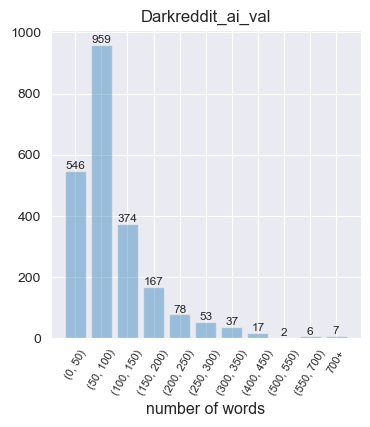

In [10]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11= 0
a12 = 0
num = []
for num in darkreddit_ai_val[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a6+=1
    elif num in range(300,350):
        a7+=1
    elif num in range(400,450):
        a8+=1
    elif num in range(500,550):
        a9+=1
    elif num in range(550,700):
        a10+=1
    elif num > 700:
        a11+=1
print(a10)
plt.figure(figsize=(4,4))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8.5)
plt.xlabel('number of words',fontsize = 11.5)
plt.xticks(ticks=range(0,11),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,550),(550,700),'700+'],rotation=60,fontsize = 8)
plt.title('Darkreddit_ai_val')
plt.savefig('numwords_dditai_val.png',bbox_inches = 'tight')
plt.show()

35


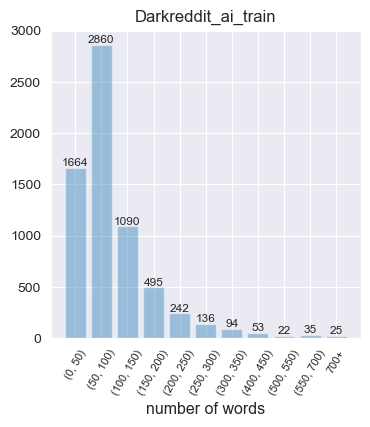

In [11]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11= 0
a12 = 0
num = []
for num in darkreddit_ai_train[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a6+=1
    elif num in range(300,350):
        a7+=1
    elif num in range(400,450):
        a8+=1
    elif num in range(500,550):
        a9+=1
    elif num in range(550,700):
        a10+=1
    elif num > 700:
        a11+=1
print(a10)
plt.figure(figsize=(4,4))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8.5)
plt.xlabel('number of words',fontsize = 11.5)
plt.xticks(ticks=range(0,11),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,550),(550,700),'700+'],rotation=60,fontsize = 8)
plt.gca().spines["top"].set_visible(True)
plt.gca().spines["right"].set_visible(True)
plt.gca().spines["bottom"].set_visible(True)
plt.gca().spines["left"].set_visible(True)
plt.title('Darkreddit_ai_train')
plt.savefig('numwords_dditai_train.png',bbox_inches = 'tight')
plt.show()

3


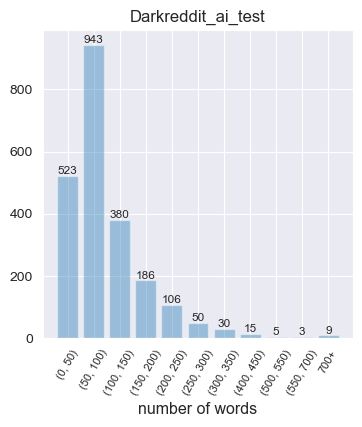

In [12]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11= 0
a12 = 0
num = []
for num in darkreddit_ai_test[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a6+=1
    elif num in range(300,350):
        a7+=1
    elif num in range(400,450):
        a8+=1
    elif num in range(500,550):
        a9+=1
    elif num in range(550,700):
        a10+=1
    elif num > 700:
        a11+=1
print(a10)
plt.figure(figsize=(4,4))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8.5)
plt.xlabel('number of words',fontsize = 11.5)
plt.xticks(ticks=range(0,11),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,550),(550,700),'700+'],rotation=60,fontsize = 8)
plt.title('Darkreddit_ai_test')
plt.savefig('numwords_dditai_test.png',bbox_inches = 'tight')
plt.show()

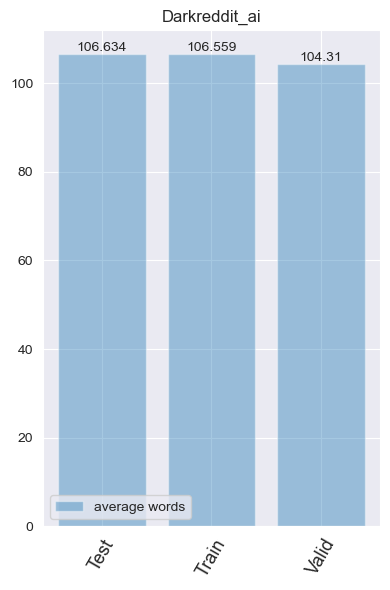

In [13]:
plt.figure(figsize=(4,6))
x_label = ['Test','Train','Valid']
p1 = plt.bar(range(0,len(avg_tokens_ai)), avg_tokens_ai, alpha=0.4, align='center', label='average words')
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', label='number of files')
plt.bar_label(p1,fontsize = 10)
# plt.xlabel('dataset',fontsize = 20)
plt.xticks(ticks=range(0,3),labels= ['Test','Train','Valid'],rotation=60,fontsize = 13)
plt.legend(loc=3)
plt.title('Darkreddit_ai')
plt.tight_layout()
plt.savefig('/Users/bingru/Workspace/ML/IndividualProject/data image/avg_words_dditai.png')
plt.show()

In [14]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
num = []
for num in darkreddit_av_test[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,700):
        a9+=1
    elif num >700:
        a10+=1

In [15]:
print(a10)

58


44


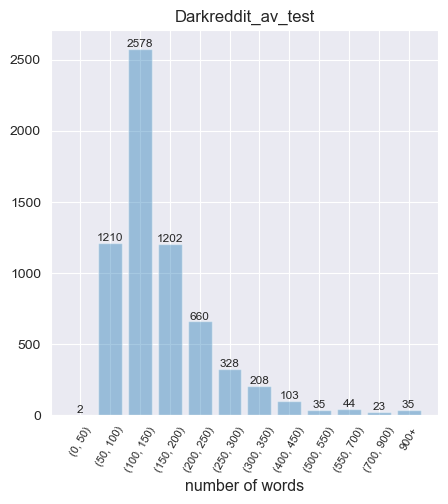

In [16]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11= 0
a12 = 0
num = []
for num in darkreddit_av_test[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a6+=1
    elif num in range(300,350):
        a7+=1
    elif num in range(400,450):
        a8+=1
    elif num in range(500,550):
        a9+=1
    elif num in range(550,700):
        a10+=1
    elif num in range(700,900):
        a11+=1
    elif num >900:
        a12+=1
print(a10)
plt.figure(figsize=(5,5))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8.5)
plt.xlabel('number of words',fontsize = 11.5)
plt.xticks(ticks=range(0,12),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,550),(550,700),(700,900),'900+'],rotation=60,fontsize = 8)
plt.gca().spines["top"].set_visible(True)
plt.gca().spines["right"].set_visible(True)
plt.gca().spines["bottom"].set_visible(True)
plt.gca().spines["left"].set_visible(True)
plt.title('Darkreddit_av_test')
plt.savefig('numwords_dditav_test.png',bbox_inches = 'tight')
plt.show()

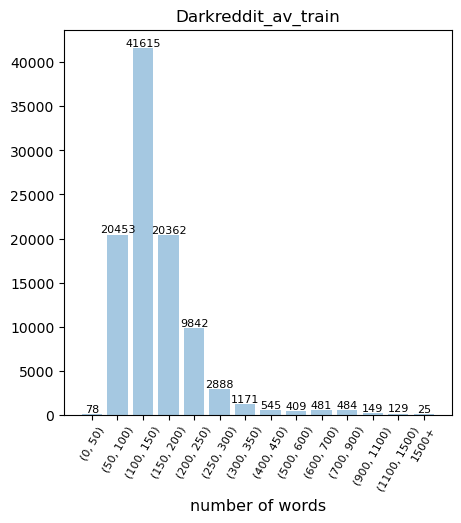

In [173]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11 = 0
a12 = 0
a13=0
a14 = 0
num = []
for num in darkreddit_av_train[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1
    elif num in range(600,700):
        a10+=1
    elif num in range(700,900):
        a11+=1
    elif num in range(900,1100):
        a12+=1
    elif num in range(1100,1500):
        a13+=1
    elif num >1500:
        a14+=1
plt.figure(figsize=(5,5))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8)
plt.xlabel('number of words',fontsize = 11.5)
plt.xticks(ticks=range(0,14),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,600),(600,700),(700,900),(900,1100),(1100,1500),'1500+'],rotation=60,fontsize = 8)
plt.gca().spines["top"].set_visible(True)
plt.gca().spines["right"].set_visible(True)
plt.gca().spines["bottom"].set_visible(True)
plt.gca().spines["left"].set_visible(True)
plt.title('Darkreddit_av_train')
plt.savefig('numwords_dditav_train.png',bbox_inches = 'tight')
plt.show()

50344


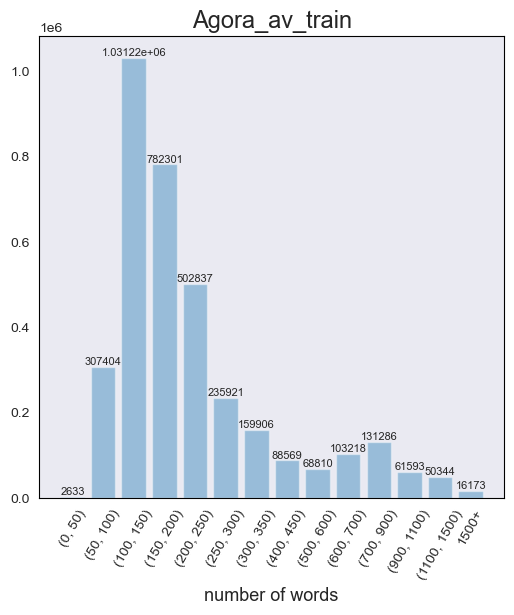

In [21]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11 = 0
a12 = 0
a13=0
a14 = 0
num = []
for num in darknet_av_train[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1
    elif num in range(600,700):
        a10+=1
    elif num in range(700,900):
        a11+=1
    elif num in range(900,1100):
        a12+=1
    elif num in range(1100,1500):
        a13+=1
    elif num in range(1500,2000):
        a14+=1
print(a13)
plt.figure(figsize=(6,6))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8)
plt.xlabel('number of words',fontsize = 13)
plt.xticks(ticks=range(0,14),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,600),(600,700),(700,900),(900,1100),(1100,1500),'1500+'],rotation=60,fontsize = 10)
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.title('Agora_av_train',fontsize = 17)
plt.grid(False)
plt.savefig('numwords_agroa_train.png',bbox_inches = 'tight',transparent=True)
plt.show()

2624


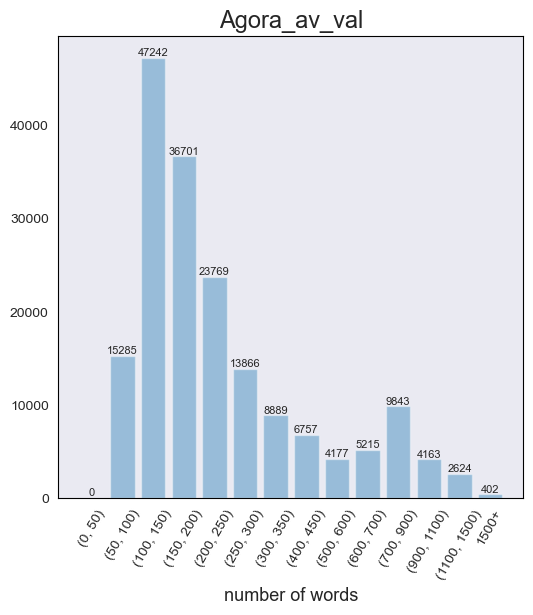

In [22]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11 = 0
a12 = 0
a13=0
a14 = 0
num = []
for num in darknet_av_val[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1
    elif num in range(600,700):
        a10+=1
    elif num in range(700,900):
        a11+=1
    elif num in range(900,1100):
        a12+=1
    elif num in range(1100,1500):
        a13+=1
    elif num in range(1500,2000):
        a14+=1
print(a13)
plt.figure(figsize=(6,6))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8)
plt.xlabel('number of words',fontsize = 13)
plt.xticks(ticks=range(0,14),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,600),(600,700),(700,900),(900,1100),(1100,1500),'1500+'],rotation=60,fontsize = 10)
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.title('Agora_av_val',fontsize = 17)
plt.grid(False)
plt.savefig('numwords_agroa_val.png',bbox_inches = 'tight',transparent=True)
plt.show()

2293


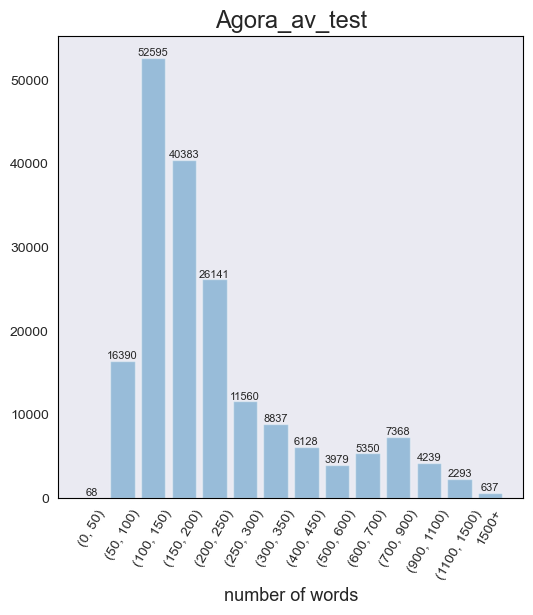

In [23]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11 = 0
a12 = 0
a13=0
a14 = 0
num = []
for num in darknet_av_test[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1
    elif num in range(600,700):
        a10+=1
    elif num in range(700,900):
        a11+=1
    elif num in range(900,1100):
        a12+=1
    elif num in range(1100,1500):
        a13+=1
    elif num in range(1500,2000):
        a14+=1
print(a13)
plt.figure(figsize=(6,6))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8)
plt.xlabel('number of words',fontsize = 13)
plt.xticks(ticks=range(0,14),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,600),(600,700),(700,900),(900,1100),(1100,1500),'1500+'],rotation=60,fontsize = 10)
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.title('Agora_av_test',fontsize = 17)
plt.grid(False)
plt.savefig('numwords_agroa_test.png',bbox_inches = 'tight',transparent=True)
plt.show()

In [23]:
print(sk_val)

[]


117


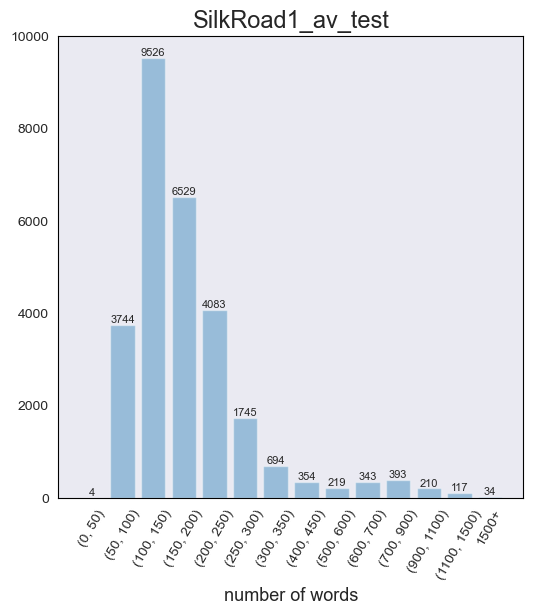

In [24]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11 = 0
a12 = 0
a13=0
a14 = 0
num = []
for num in sk_av_test[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1
    elif num in range(600,700):
        a10+=1
    elif num in range(700,900):
        a11+=1
    elif num in range(900,1100):
        a12+=1
    elif num in range(1100,1500):
        a13+=1
    elif num in range(1500,2000):
        a14+=1
print(a13)
plt.figure(figsize=(6,6))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8)
plt.xlabel('number of words',fontsize = 13)
plt.xticks(ticks=range(0,14),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,600),(600,700),(700,900),(900,1100),(1100,1500),'1500+'],rotation=60,fontsize = 10)
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.title('SilkRoad1_av_test',fontsize = 17)
plt.grid(False)
plt.savefig('numwords_sk_test.png',bbox_inches = 'tight',transparent=True)
plt.show()

296


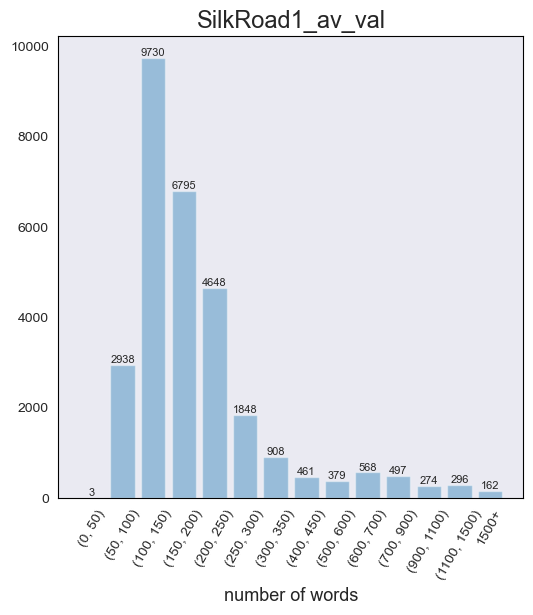

In [26]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11 = 0
a12 = 0
a13=0
a14 = 0
num = []
for num in sk_av_val[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1
    elif num in range(600,700):
        a10+=1
    elif num in range(700,900):
        a11+=1
    elif num in range(900,1100):
        a12+=1
    elif num in range(1100,1500):
        a13+=1
    elif num in range(1500,2000):
        a14+=1
print(a13)
plt.figure(figsize=(6,6))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8)
plt.xlabel('number of words',fontsize = 13)
plt.xticks(ticks=range(0,14),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,600),(600,700),(700,900),(900,1100),(1100,1500),'1500+'],rotation=60,fontsize = 10)
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.title('SilkRoad1_av_val',fontsize = 17)
plt.grid(False)
plt.savefig('numwords_sk_val.png',bbox_inches = 'tight',transparent=True)
plt.show()

3130


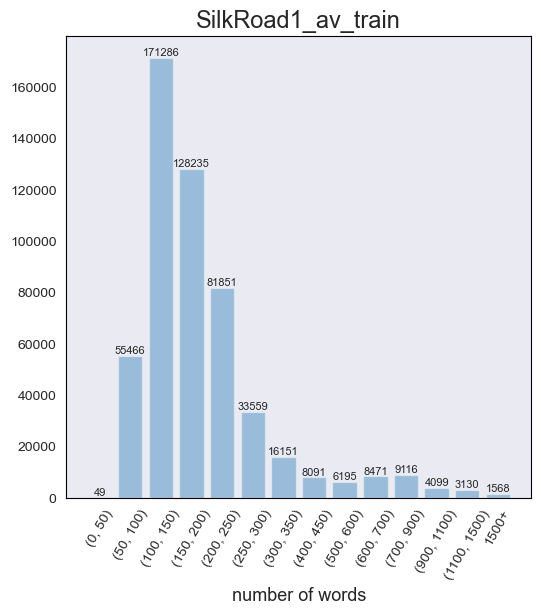

In [25]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11 = 0
a12 = 0
a13=0
a14 = 0
num = []
for num in sk_av_train[0]:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1
    elif num in range(600,700):
        a10+=1
    elif num in range(700,900):
        a11+=1
    elif num in range(900,1100):
        a12+=1
    elif num in range(1100,1500):
        a13+=1
    elif num in range(1500,2000):
        a14+=1
print(a13)
plt.figure(figsize=(6,6))
x = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8)
plt.xlabel('number of words',fontsize = 13)
plt.xticks(ticks=range(0,14),labels= [(0,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(400,450),(500,600),(600,700),(700,900),(900,1100),(1100,1500),'1500+'],rotation=60,fontsize = 10)
plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.title('SilkRoad1_av_train',fontsize = 17)
plt.grid(False)
plt.savefig('numwords_sk_train.png',bbox_inches = 'tight',transparent=True)
plt.show()

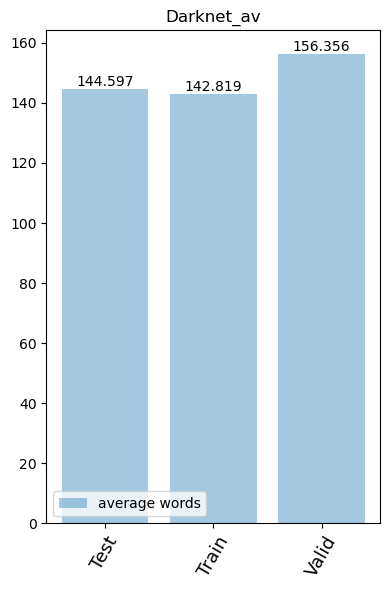

In [92]:
plt.figure(figsize=(4,6))
x_label = ['Test','Train','Valid']
p1 = plt.bar(range(0,len(darknet_tokens_av)), darknet_tokens_av, alpha=0.4, align='center', label='average words')
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', label='number of files')
plt.bar_label(p1,fontsize = 10)
# plt.xlabel('dataset',fontsize = 20)
plt.xticks(ticks=range(0,3),labels= ['Test','Train','Valid'],rotation=60,fontsize = 13)
plt.legend(loc=3)
plt.title('Darknet_av')
plt.tight_layout()
plt.savefig('avg_words_Darknet_av.png')
plt.show()

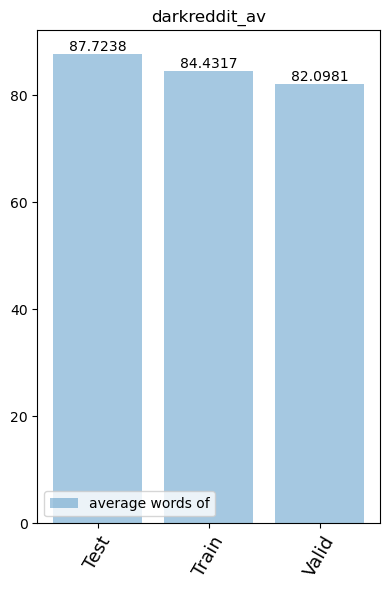

In [62]:
plt.figure(figsize=(4,6))
x_label = ['Test','Train','Valid']
p1 = plt.bar(range(0,len(darkreddit_tokens_av)), darkreddit_tokens_av, alpha=0.4, align='center', label='average words of')
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', label='number of files')
plt.bar_label(p1,fontsize = 10)
# plt.xlabel('dataset',fontsize = 20)
plt.xticks(ticks=range(0,3),labels= ['Test','Train','Valid'],rotation=60,fontsize = 13)
plt.legend(loc=3)
plt.title('darkreddit_av')
plt.savefig('avg_words_dditav.png')
plt.tight_layout()
plt.show()

In [26]:
total_tokens = 0
num_files = 0
with open(path7, encoding='utf-8') as fp:
    for idx, line in enumerate(tqdm(fp)):
        line = json.loads(line)
        c12 = line['comment']
        num_tokens = len(re.split("\s+", c12.strip(), flags=re.UNICODE))
        total_tokens += num_tokens
        num_files += 1
print("num_files ", num_files)
avg_tokens = total_tokens / num_files
print("Avg tokens = ", avg_tokens)
fp.close()

2276it [00:00, 31293.08it/s]

num_files  2276
Avg tokens =  106.63400702987698


In [27]:
total_tokens = 0
num_files = 0
with open(path8, encoding='utf-8') as fp:
    for idx, line in enumerate(tqdm(fp)):
        line = json.loads(line)
        c12 = line['comment']
        num_tokens = len(re.split("\s+", c12.strip(), flags=re.UNICODE))
        total_tokens += num_tokens
        num_files += 1
print("num_files ", num_files)
avg_tokens = total_tokens / num_files
print("Avg tokens = ", avg_tokens)
fp.close()

6817it [00:00, 35123.29it/s]

num_files  6817
Avg tokens =  106.5594836438316


In [28]:
total_tokens = 0
num_files = 0
with open(path9, encoding='utf-8') as fp:
    for idx, line in enumerate(tqdm(fp)):
        line = json.loads(line)
        c12 = line['comment']
        num_tokens = len(re.split("\s+", c12.strip(), flags=re.UNICODE))
        total_tokens += num_tokens
        num_files += 1
print("num_files ", num_files)
avg_tokens = total_tokens / num_files
print("Avg tokens = ", avg_tokens)
fp.close()

2275it [00:00, 31728.54it/s]

num_files  2275
Avg tokens =  104.31032967032966


In [9]:
data_dir = "/Users/bingru/Workspace/ML/IndividualProject/Data/darkreddit_authorship_attribution_anon"

In [10]:
def get_data_path(data_dir):
    dirs = os.listdir(data_dir)
    for path in dirs:
        if "_train_" in path:
            train_path = os.path.join(data_dir,path)
        elif "_val_" in path:
            val_path = os.path.join(data_dir,path)
        elif "_test_" in path:
            test_path = os.path.join(data_dir,path)
    return train_path, val_path, test_path

In [11]:
def getDataJSON(route):
    with open(route,"r",encoding="utf-8") as f:
        result = [json.loads(line) for line in f.read().splitlines()]
    return result

In [148]:
def get_data(path, ngram_range=(1,2)):
    data = pd.DataFrame(getDataJSON(path))
    return data

In [149]:
train_path, val_path, test_path = get_data_path(data_dir)

In [150]:
train = get_data(train_path)
test = get_data(test_path)

In [151]:
train.head()

,author,comment
0,user1,"lol, I don't think you'd be fucking over DeafP..."
1,user1,"You know, I think you might be right. In fact..."
2,user1,"Yeah, my guess is that its overlooked somewher..."
3,user1,I'd be curious what drugs are actually cheaper...
4,user1,&gt; wtf is a partial ship?\n\nLMFAO! I was w...


In [152]:
size = len(train['comment'])
print(size)

6817


In [153]:
word_num = []
for i in range(len(train['comment'])):
    s = (train['comment'][i]).split()
    word_num.append(len(s))

In [154]:
print(word_num)

[74, 94, 111, 287, 70, 148, 126, 62, 98, 45, 61, 171, 142, 40, 56, 220, 52, 158, 51, 64, 58, 50, 67, 185, 191, 280, 406, 145, 99, 79, 44, 52, 138, 82, 56, 70, 50, 163, 166, 93, 93, 71, 105, 60, 197, 260, 39, 91, 192, 42, 48, 38, 57, 65, 138, 55, 55, 52, 51, 91, 580, 132, 141, 125, 38, 201, 110, 41, 40, 41, 89, 56, 55, 140, 117, 62, 50, 150, 72, 119, 65, 49, 80, 179, 76, 84, 84, 56, 68, 68, 59, 50, 69, 65, 76, 73, 78, 58, 61, 49, 46, 193, 309, 124, 108, 102, 132, 51, 88, 468, 476, 146, 225, 413, 91, 70, 38, 117, 298, 107, 66, 142, 66, 47, 86, 131, 131, 236, 152, 60, 81, 72, 88, 196, 45, 58, 77, 236, 88, 100, 42, 118, 135, 199, 92, 69, 71, 427, 63, 97, 177, 94, 43, 131, 336, 74, 255, 49, 65, 125, 356, 94, 43, 65, 294, 144, 359, 135, 126, 408, 112, 48, 63, 52, 335, 65, 114, 208, 72, 281, 59, 190, 98, 172, 105, 41, 191, 101, 59, 54, 425, 56, 129, 88, 177, 235, 45, 220, 180, 66, 111, 51, 36, 127, 69, 132, 91, 104, 357, 51, 261, 57, 119, 100, 145, 44, 49, 65, 305, 81, 44, 286, 92, 101, 324, 

In [155]:
s = 0
for i in word_num:
    s = s+i
avg_word = s/len(word_num)
print(avg_word)

106.5594836438316


In [156]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
num = []
for num in word_num:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1

In [157]:
print(a9)

11


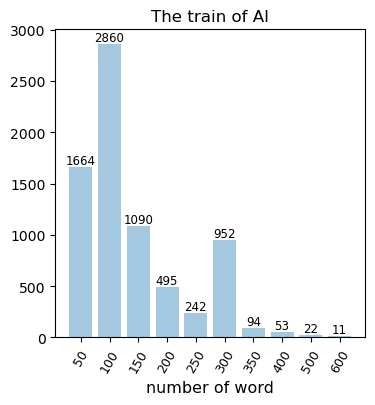

In [158]:
import numpy as np
# plt.figure(figsize=(4,6))
# plt.bar((1000,2000,3000,4000,5000,6000),(a100,a200,a300,a400,a500,a600))
# plt.show()
plt.figure(figsize=(4,4))
x = [a1,a2,a3,a4,a5,a,a6,a7,a8,a9]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a,a6,a7,a8,a9],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8.5)
plt.xlabel('number of word',fontsize = 11.5)
plt.xticks(ticks=range(0,10),labels= [50,100,150,200,250,300,350,400,500,600],rotation=60,fontsize = 9)
plt.title('The train of AI')
plt.savefig('num_words_train.png')
plt.show()


In [159]:
word_num2 = []
for i in range(len(test['comment'])):
    s = (test['comment'][i]).split()
    word_num2.append(len(s))

In [161]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
num = []
for num in word_num:
    if num in range(0,50):
        a1+=1
    elif num in range(50,100):
        a2+=1
    elif num in range(100,150):
        a3+=1
    elif num in range(150,200):
        a4+=1
    elif num in range(200,250):
        a5+=1
    elif num in range(250,300):
        a+=1
    elif num in range(300,350):
        a6+=1
    elif num in range(400,450):
        a7+=1
    elif num in range(500,550):
        a8+=1
    elif num in range(550,600):
        a9+=1
    elif num in range(600,800):
        a10+=1

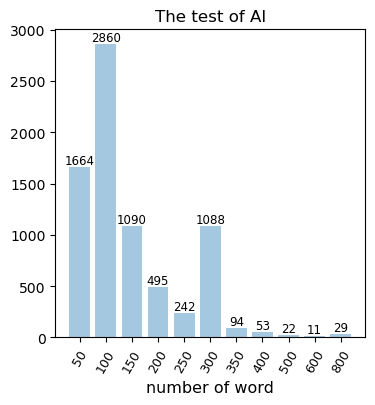

In [162]:
plt.figure(figsize=(4,4))
x = [a1,a2,a3,a4,a5,a,a6,a7,a8,a9,a10]
p1 = plt.bar(range(0,len(x)),[a1,a2,a3,a4,a5,a,a6,a7,a8,a9,a10],alpha=0.4)
#p2 = plt.bar(range(0,len(num_file_ai)), num_file_ai, alpha=1, align='center', )
plt.bar_label(p1,fontsize = 8.5)
plt.xlabel('number of word',fontsize = 11.5)
plt.xticks(ticks=range(0,11),labels= [50,100,150,200,250,300,350,400,500,600,800],rotation=60,fontsize = 9)
plt.title('The test of AI')
plt.savefig('num_words_test.png')
plt.show()